# ПРОЕКТ "Стримчик"

Описание проекта - магазин Стримчик продает компьютерные игры.Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертв, жанры и платформы. Нам необходимо выявить определяющие успешность игры закономерности.Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

В рамках проекта проведем след. работы:
 
 Предобработка данных:
Заменим названия столбцов (приведите к нижнему регистру);
Преобразуем данные в нужные типы.
Обработаем пропуски при необходимости:
Опишим причины, которые могли привести к пропускам;
Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишим, как его обработать;
Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.
  
 Исследовательский анализ:
Посмотрим, сколько игр выпускалось в разные годы. Решим, важны ли данные за все периоды
Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам. Определим срок жизни платформ.
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. 
определим, какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
Соотнесем выводы с продажами игр на других платформах.
Посмотрим на общее распределение игр по жанрам. Опишем самые прибыльные жанры. 

 Составим портрет пользователя каждого региона:
Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишим различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

Проверка гипотез:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Описание данных:
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


## Предобрабока данных

Заменим названия столбцов (приведите к нижнему регистру); Преобразуем данные в нужные типы. Обработаем пропуски при необходимости: Опишим причины, которые могли привести к пропускам; Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишим, как его обработать; Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

Далее импортируем все необходимые нам библиотеки

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
import numpy as np
import scipy.stats as st

In [2]:
df = pd.read_csv("/datasets/games.csv")

In [3]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Предварительный осмотр данных позволяет сказать что в целом все данные корректные, нет отрицательных значений, нет выбросов за разумные границы. но бросается в глаза, что максимальные продажи очень сильно отличаются от 3 квантиля 75%. далее мы рассмотрим как это выглядит и попытаемся понять причину

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тут мы оцениваем количество значений, количество ненулевых значений и попытаемся обработать нулевые значения. далее также мы оцениваем какие типы данных и возможно некоторые типы скорректируем

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
rows_with_null = df.loc[df['Name'].isnull()]
rows_with_null

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Комментарий ревьюера
rows_with_null

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Здесь нам удалось выявить что 2 строчки с пропуском в имени. Они также содержит пропуски фактически во всех остальных данных в том числе жанре эти 2 строчки мы безболезненно удалим далее

In [8]:
df.columns = df.columns.str.lower()

Для удобства последующей работы все названия столбцов приведены к нижнему регистру

In [9]:
rows_with_null = df.loc[df['year_of_release'].isnull()]
display(rows_with_null)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Тут мы попытались рассмотреть как выглядят данные с пропущенными годами выпуска и выявили интересную особенность. в названии некоторых игр содержатся год выпуска причем он занимает последние 4 символа а постараемся выделить эту категорию отдельно обработать и прописать год выпуска для этих игр

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
df = df.dropna(subset=['name'])

Удалили те 2 строчки пропущен названием игры и жанром и проверим как теперь выглядит база данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Удалили 2 строки т.к. в них практически отсутствовала информация. Не было ни имени, ни жанра, ни рейтингов. Только минимальные цифры продаж.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
fil_rows = df[(df['year_of_release'].isna())&(df['name'].str.match('.*\d{4}$'))]
fil_rows['year_of_release'] = fil_rows['name'].str[-4:].astype(float)
fil_rows.info()
fil_rows.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 183 to 16373
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15 non-null     object 
 1   platform         15 non-null     object 
 2   year_of_release  15 non-null     float64
 3   genre            15 non-null     object 
 4   na_sales         15 non-null     float64
 5   eu_sales         15 non-null     float64
 6   jp_sales         15 non-null     float64
 7   other_sales      15 non-null     float64
 8   critic_score     11 non-null     float64
 9   user_score       11 non-null     object 
 10  rating           10 non-null     object 
dtypes: float64(6), object(5)
memory usage: 1.4+ KB


/tmp/ipykernel_569/2206381859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_rows['year_of_release'] = fil_rows['name'].str[-4:].astype(float)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,2002.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,2005.0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,2003.0,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
8918,All-Star Baseball 2005,XB,2005.0,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Когда выскакивают предупреждения, это означает, что в будущей новой версии библиотеки применяемый метод обработки будет не применим. Если мы планируем данный код использовать в будущем, то надо разобраться и изменить код. Если нам он в будущем не понадобится, то можно принудительно запретить вывод предупреждений вставив в ячейку с библиотеками вот такой код: <br>`pd.set_option('chained_assignment', None)` или такой: <br></font>
`import warnings`<br>
`warnings.filterwarnings("ignore")`

In [16]:
df.loc[fil_rows.index,'year_of_release']=fil_rows['year_of_release']

Здесь мы выбрали категорию игр в которых последние 4 символа содержит цифры, проанализировали и выявили следующую закономерность: это небольшая группа всего 15 игр все они являются по сути спортивными симуляторами посвящёнными проведению определённых турниров и с большой долей вероятности можно утверждать, что это соответствует году выпуска. поскольку игра посвященную какому то турниру актуальна именно в год крайнем случае следующий год то от прохождения турнира. а также в в этой категории игр оказалась одна игра с очень большими цифрами продаж, поэтому хоть категория и малочисленная, крайне нежелательна её удалять. поэтому мы присвоили последние 4 цифры, которые является годом собственно году выпуска и оставили эти игры в базе

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [18]:
rows_with_null = df.loc[df['year_of_release'].isnull()]
rows_with_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
df['year_of_release'].describe()

count    16459.000000
mean      2006.485084
std          5.873422
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Здесь мы проверяем что после присвоение года играм с цифрами в конце мы не получили какое либо значение выбивающееся из нашего диапазона все корректно то есть лежит диапазоне от 1980 до 2016 

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
print(df[df['user_score']=='tbd'])

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score 

Здесь мы проанализировали категорию tbd в пользовательском рейтинге. данная аббревиатура означает, что рейтинг игре не присвоен или должен быть присвоен а для нас это эквивалентно тому, что рейтинг отсутствует. поэтому мы заменим значение tbd на NaN (отсутствие рейтинга)

In [22]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [24]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Добавили новый столбец, в которым просуммировали продажи по всем регионам

In [25]:
df_sorted = df[df['user_score']=='tbd']
df_sorted = df_sorted.sort_values(by='total_sales',ascending=False)
df_sorted.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2.24
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,2.22
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,2.06
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E,1.71


In [27]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Была попытка увидеть визуально корреляцию между цифрами продаж и рейтингом пользователя, что казалось предварительно логичным. но осмотр показал, что данный корреляции фактически отсутствует и прямой взаимосвязи определённо нет. соответственно было желание присвоить какой-то рейтинг на основании цифр продаж. так как корреляции нет, нам придется обнулить данный рейтинг и заменить значение tbd на NaN,что мы собственно и делаем

In [28]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [29]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9778 non-null   object 
 11  total_sales      16459 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Больше никаких идей по присваиванию и заполнению отсутствующего года выпуска в голову не пришло. поэтому мы удалили пропущенные значения так как год выпуска для нас является определяющим для анализа и количество удаленных записей невелико (254) что составляет 1.5%

In [30]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
# df['user_score'].replace('tbd',pd.NA, inplace=True)
# df.info()

In [32]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
total_sales           0
dtype: int64

Проверили какие столбцах сколько пропусков, но поскольку они только содержатся в 3 рейтингах мы с этими значениями ничего делать не будем. потому что они составляют значительную часть базы и мы попытаемся работать с учетом этих пропусков 

In [33]:
df.duplicated().sum()

0

Проверим данные на неявные дубликаты. Проверку осуществим по значимым параметрам: название игры, платформа, год релиза.

In [34]:
df.duplicated(subset=['name', 'platform','year_of_release']).sum()

1

In [35]:
display(df[df.duplicated(subset=['name', 'platform','year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [36]:
df.query('name=="Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


В результате проверки выявили, что игра Madden NFL 13 на PS3 встречается дважды. Это неяввные дубликаты. Второе включение практически пустое. Мое объяснение таково: в результате ввода информации оператор обнаружил, что такое значение уже введено и не стал заполнять дальше. Есть 2 варианта: добавить eu_sales 2го к 1му и удалить 2е вхождение. Т.к. цифра незначительна, я считаю, что это был ошибочный ввод. Поэтому я просто удалю 2е вхождение без корректировки 1го.

In [37]:
df = df.drop_duplicates(subset=['name', 'platform','year_of_release'],keep='first')
df.query('name=="Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23


In [38]:
min_year = df.loc[df['critic_score'].notna(),'year_of_release'].min()
min_year

1985

In [39]:
min_year = df.loc[df['user_score'].notna(),'year_of_release'].min()
min_year

1985

In [40]:
min_year = df.loc[df['rating'].notna(),'year_of_release'].min()
min_year

1985

In [41]:
df_sorted = df[df['user_score'].notna()]
df_sorted = df_sorted.sort_values(by='year_of_release',ascending=True)
df_sorted.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T,0.04
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
1567,Battle Arena Toshinden,PS,1994,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T,1.26
9214,Super Puzzle Fighter II Turbo,PS,1996,Puzzle,0.08,0.05,0.00,0.01,83.0,7.4,E,0.14
6631,WipEout XL,PS,1996,Racing,0.14,0.10,0.00,0.02,93.0,8.7,NaN,0.26
2014,Tomb Raider,PC,1996,Action,0.96,0.07,0.00,0.00,86.0,8.5,M,1.03
203,Resident Evil,PS,1996,Action,2.05,1.16,1.11,0.73,91.0,9.0,M,5.05
229,Tomb Raider,PS,1996,Action,2.29,1.97,0.13,0.24,91.0,8.6,T,4.63
153,Tekken 2,PS,1996,Fighting,2.26,1.89,1.36,0.23,89.0,8.9,T,5.74


In [42]:
df_sorted = df[df['critic_score'].isnull()]
df_sorted = df_sorted.sort_values(by='year_of_release',ascending=False)
df_sorted.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1216,Ratchet & Clank (2016),PS4,2016,Platform,0.50,0.76,0.04,0.24,NaN,NaN,NaN,1.54
10371,WWE 2K17,X360,2016,Sports,0.05,0.04,0.00,0.01,NaN,NaN,T,0.10
10403,Skylanders Imaginators,PS3,2016,Platform,0.02,0.07,0.00,0.02,NaN,NaN,E10+,0.11
10405,Fate/Extella: The Umbral Star,PS4,2016,Action,0.00,0.00,0.11,0.00,NaN,NaN,T,0.11
1275,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN,1.49
10435,Taiko no Tatsujin: Don Don! Mystery Adventure,3DS,2016,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10
14992,The Legend of Heroes: Trails in the Sky Third ...,PSV,2016,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
10772,The Idolmaster: Platinum Stars,PS4,2016,Simulation,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10


Дополнительно была предпринята попытка оценить в каких случаях есть пропуски в рейтингах. Из того, что удалось обнаружить. 1й рейтинг появился в 1985. Это касается всех 3х видов оценок. До этого игры не оценивались. Также преимущественно без рейтинга игры с минимальными продажами. Внитрияпонские игры могут не иметь рейтинга. Но это все не правило. Н-р, Doom(2016) на PS4 с хорошими продажами не имеет рейтинга.

In [43]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   float64
 9   user_score       7471 non-null   float64
 10  rating           9777 non-null   object 
 11  total_sales      16458 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

### Выводы по предобработке данных

В ходе предобратботки проведены след.работы:
 - общий анализ данных
 - обработаны пропуски в названии игры. 2 строчки с пропуском удалены.
 - названия столюцов приведены к нижнему регистру
 - проверены и обработаны явные и неявные дубликаты.
 - Частично добавлен пропущенный год выпуска на год, взятый из названия игры.
 - Удалены отставшиеся строки с пропуском в годе выпуска
 - Изменен тип данных Года выпуска на целый.
 - рейтинг tbd в оценках пользователя заменен на NaN. tbd расшифровывается как to be determined (подлежит определению). Что эквивалентно NaN.
 - По итогу выявлено, что остались пропуски только в 3 категориях рейтингов. Это легко обяснимо. Продажи учитываются по всему миру. При этом есть игры, которые продаются только на локальном рынке. А оценка могла происходить на другом рынке. Поэтому игра просто не попала в рассматриваемые. Также игра с мин.продажами никому особо не интересна и могла сознательно не оцениваться рейтингом. Также рейтинг ESRB это рейтинг амер. и европейских производителей. Заведомо японские локальные игры им не оцениваются. Также могли не попадать под рейтинг игры на каких-то платформах. Или в целом присваивать рейтинг начали лишь с какого-то года. Как бы то ни было, у нас нет задачи заполнять рейтинг каким-то значением(числовым). Последующие оценки проведем по существующим рейтингам.
 - В столбце rating стоят символьные значения. И мы можем безболезненно заменить в дальнейшем пропущенные значения на заглушку "unknown"

## Исследовательский анализ 

Посмотрим, сколько игр выпускалось в разные годы. Решим, важны ли данные за все периоды Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам. Определим срок жизни платформ. Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. определим, какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесем выводы с продажами игр на других платформах. Посмотрим на общее распределение игр по жанрам. Опишем самые прибыльные жанры. 

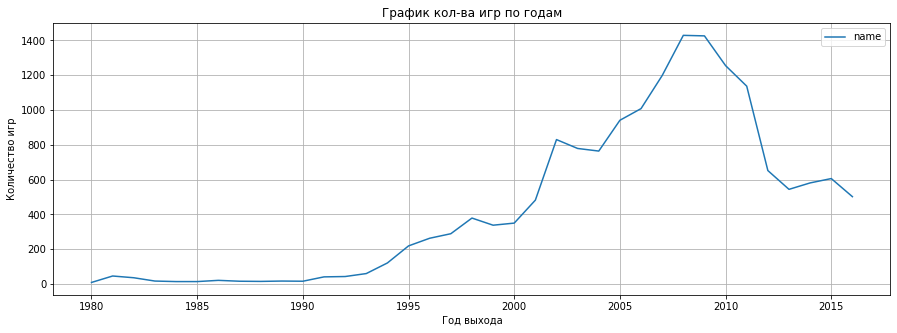

In [44]:
df_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_by_year.plot.line(grid=True, ylabel='Количество игр', xlabel='Год выхода', figsize=(15,5))
None
plt.title('График кол-ва игр по годам')
plt.show()

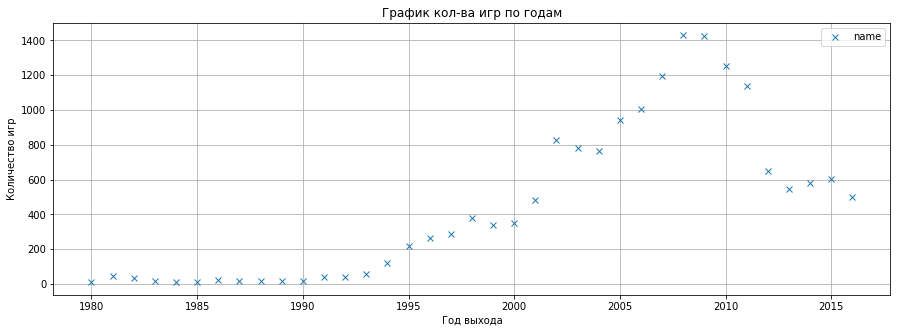

In [45]:
df_by_year.plot.line(grid = True, ylabel = 'Количество игр', xlabel = 'Год выхода', figsize=(15,5), style = 'x')
None
plt.title('График кол-ва игр по годам')
plt.show()

In [46]:
df_by_year = df_by_year[df_by_year['name'] >= df_by_year.quantile(0.25)['name']]
df_by_year

,name
year_of_release,
1981,46
1982,36
1991,41
1992,43
1993,60
1994,121
1995,219
1996,263
1997,289


Проверка по году выпуску выявила что регулярные выпуск игр начался с 91 года хотя отдельные позиции были и в начале годах 81 82

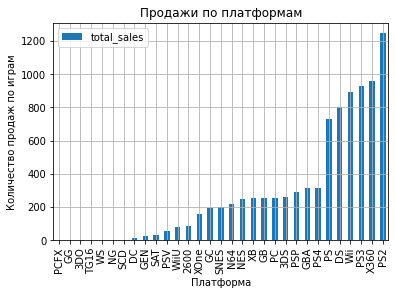

,total_sales
count,31.000000
mean,284.824194
std,345.220567
min,0.030000
25%,22.150000
50%,200.040000
75%,301.210000
max,1247.280000


In [47]:
df_top_platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales')
df_top_platforms.sort_values(by = 'total_sales').plot.bar(grid = True)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж по играм')
plt.show()
None
display(df_top_platforms.describe())

Здесь мы делаем анализ по всем выпускаемым платформам и ранжируем их

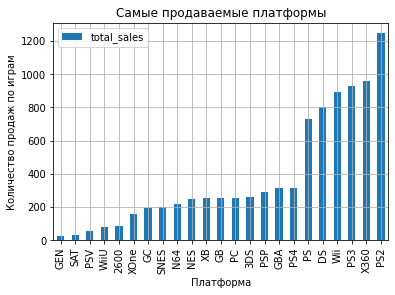

In [48]:
df_top_platforms = df_top_platforms[df_top_platforms['total_sales'] > df_top_platforms.quantile(0.25)['total_sales']]
df_top_platforms.sort_values(by = 'total_sales').plot.bar(grid = True)
plt.title('Самые продаваемые платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж по играм')
plt.show()
None

Исключили из рассмотрения продажи на платформах с минимальным количеством продаж(меньше 1 квантиля-25%)

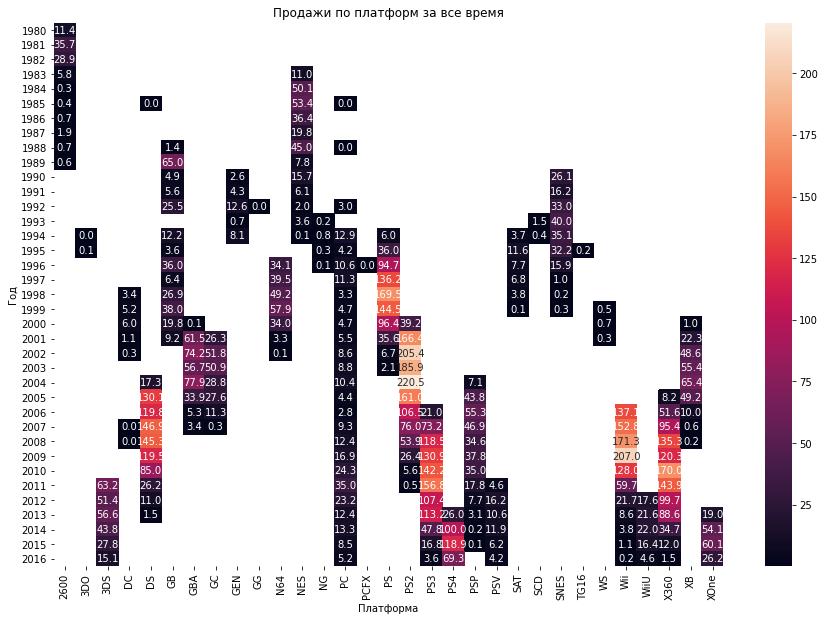

In [49]:
df_by_platforms = df.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum')

plt.figure(figsize=(15,10))
sb.heatmap(df_by_platforms, annot=True, fmt=".1f")
plt.title('Продажи по платформ за все время')
plt.xlabel('Платформа')
plt.ylabel('Год')
None


<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким артефактом у платформы DS. Тогда бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
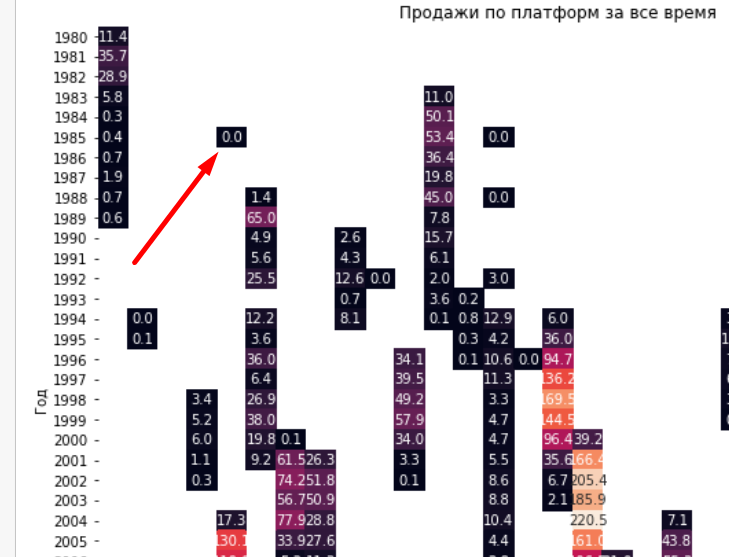

Из данного графика виден явный артефакт с платформой DS, в которой якобы была игра в 1985г. Т.к.после 1985 20 лет пропуск и следующий выпуск в 2004г. Рассмотрим подробнее.

In [50]:
df[(df['platform']=='DS')&(df['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Очевидно ошибочный ввод. Удалим эту строчку т.к. она негативно повлияет на последующие расчеты.

In [51]:
df = df.drop(df[(df['platform']=='DS')&(df['year_of_release']==1985)].index)

In [52]:
plat_year_stats = df.groupby('platform')['year_of_release'].agg(['max','min'])
plat_year_stats['diff']= plat_year_stats['max']-plat_year_stats['min']+1
print(plat_year_stats)
average_diff = plat_year_stats['diff'].median()
print (f"Средний срок жизни платформы:{average_diff}")

           max   min  diff
platform                  
2600      1989  1980    10
3DO       1995  1994     2
3DS       2016  2011     6
DC        2008  1998    11
DS        2013  2004    10
GB        2001  1988    14
GBA       2007  2000     8
GC        2007  2001     7
GEN       1994  1990     5
GG        1992  1992     1
N64       2002  1996     7
NES       1994  1983    12
NG        1996  1993     4
PC        2016  1985    32
PCFX      1996  1996     1
PS        2003  1994    10
PS2       2011  2000    12
PS3       2016  2006    11
PS4       2016  2013     4
PSP       2015  2004    12
PSV       2016  2011     6
SAT       1999  1994     6
SCD       1994  1993     2
SNES      1999  1990    10
TG16      1995  1995     1
WS        2001  1999     3
Wii       2016  2006    11
WiiU      2016  2012     5
X360      2016  2005    12
XB        2008  2000     9
XOne      2016  2013     4
Средний срок жизни платформы:7.0


Определим цикл жизни каждой платформы для этого по каждой платформе найдем максимальный год выпуска минимальный год выпуска разницу тем самым покажет платформе определим срок его жизни и возьмём усреднённые значения
    В частности видим, что удаление прошло корректно. Теперь срок жизни платформы DS всего 9, а не 28 лет.

In [53]:
# def get_avg_live_time(df) -> list:
#     sizes = []
#     for i in df:
#         value = df[df[i].notna()][i].shape[0]
#         sizes.append(value)
#     return sizes
# list_sizes = get_avg_live_time(df_by_platforms)
# print(f'В среднем платформы живут на рынке {statistics.median(list_sizes)} лет')

In [54]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [55]:
df_by_platforms.describe()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,10.000000,2.000000,6.000000,7.000000,11.000000,13.000000,8.000000,7.000000,5.000000,1.00,...,6.000000,2.000000,10.000000,1.00,3.000000,11.000000,5.000000,12.000000,9.000000,4.000000
mean,8.648000,0.050000,42.968333,2.278571,72.980909,19.571538,39.110000,28.147143,5.670000,0.04,...,5.598333,0.930000,20.004000,0.16,0.473333,81.016364,16.438000,80.108333,28.073333,39.830000
std,13.031075,0.042426,18.278261,2.543550,61.674328,18.465580,32.768255,18.904962,4.771095,NaN,...,3.967591,0.806102,15.479666,NaN,0.200333,79.136330,7.068244,57.489691,26.547441,20.313977
min,0.270000,0.020000,15.140000,0.020000,0.020000,1.430000,0.070000,0.270000,0.650000,0.04,...,0.090000,0.360000,0.220000,0.16,0.280000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,0.640000,0.035000,31.775000,0.165000,14.140000,5.570000,4.810000,18.800000,2.600000,0.04,...,3.692500,0.645000,4.722500,0.16,0.370000,6.170000,16.350000,29.045000,0.990000,24.352500
50%,1.340000,0.050000,47.560000,1.070000,85.020000,12.180000,45.265000,27.620000,4.330000,0.04,...,5.295000,0.930000,21.185000,0.16,0.460000,59.650000,17.560000,92.000000,22.260000,40.110000
75%,9.995000,0.065000,55.267500,4.270000,124.975000,26.900000,64.687500,39.865000,8.130000,0.04,...,7.460000,1.215000,32.785000,0.16,0.570000,144.960000,21.650000,124.032500,49.230000,55.587500
max,35.680000,0.080000,63.200000,5.990000,146.940000,64.970000,77.910000,51.810000,12.640000,0.04,...,11.570000,1.500000,40.020000,0.16,0.680000,206.970000,22.030000,170.030000,65.420000,60.140000


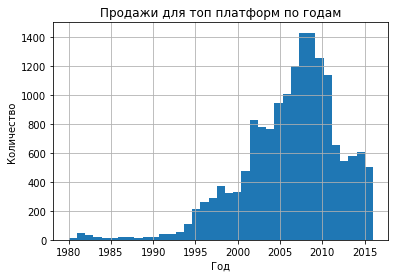

In [56]:
list_top_platforms = list(df_top_platforms.index)
df_top_platforms_year = df.query('platform in @list_top_platforms').reset_index(drop=True)
df_top_platforms_year['year_of_release'].hist(bins = 37)
plt.title('Продажи для топ платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()
None


Рассмотрели продажи на топ платформах. увидели характерные пиковую 2007 2008 году после чего вместе с мировым кризисом пошли вниз. после этого в 2011-12 гг пошла некая стабилизация на определённом уровне

Среднее время жизни платформы - 7 лет. Возьмем актуальный период, равный 4 годам. Т.образом рассмотрим данные, начиная с 2013. Это примерно половина жизненного цикла платформы.Математически это объясняется так: раз средний срок жизни платформы 7 лет, то средний возраст действующих живых платформ будет равен половине поэтому берем 3,5 условно и как раз период с 2013 года включая до 2016 года будет так называемый актуальный период. Имеем еще ввиду что данные за 2016 не полные.

In [57]:
df_actual = df.query('year_of_release>=2013').reset_index(drop = True)
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Создали выборку из первоначальной базы игры выпущенные с 2013 года включая. далее мы будем работать с с этой базой так как вся актуальная информация содержится по сути в этих данных

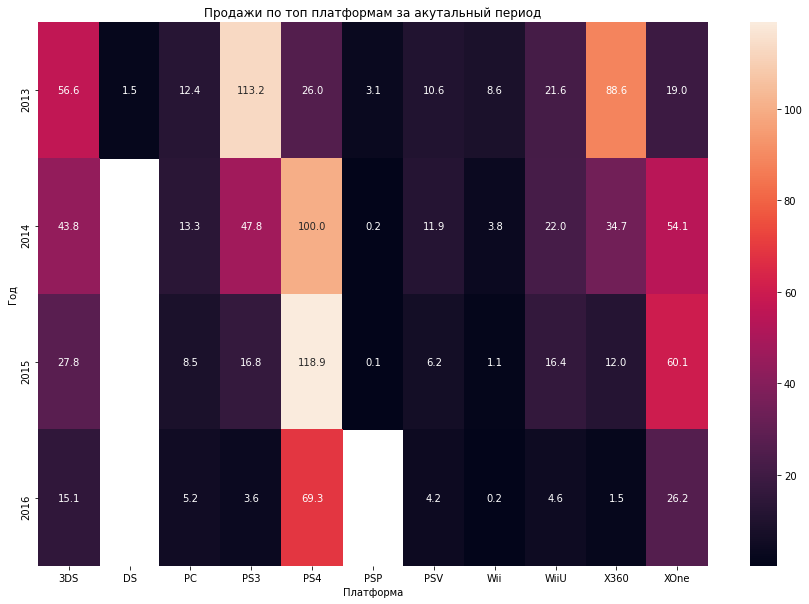

In [58]:
df_by_platforms_actual = df_actual.pivot_table(index = 'year_of_release',
columns = 'platform', values='total_sales', aggfunc = 'sum')
plt.figure(figsize=(15,10))
sb.heatmap(df_by_platforms_actual, annot=True, fmt=".1f")
plt.title('Продажи по топ платформам за акутальный период')
plt.xlabel('Платформа')
plt.ylabel('Год')
plt.show()

Создали тепловую карту по актуальным платформам это позволило выявить нам лидеров и понять тенденции по каждой платформе какие платформы растущая стагнирующей итак далее

самая популярная платформа PS4. Если предположить, что данные за 2016г. неполные, то продажи на ней растут. Аналогично XOne. На 3м месте по продажам - 3DS. Но на ней убывающая динамика. Все остальные платформы значительно уступают по продажам и снижаются.

### Анализ популярных платформ и жанров

 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесем выводы с продажами игр на других платформах. Посмотрим на общее распределение игр по жанрам. Опишем самые прибыльные жанры. 

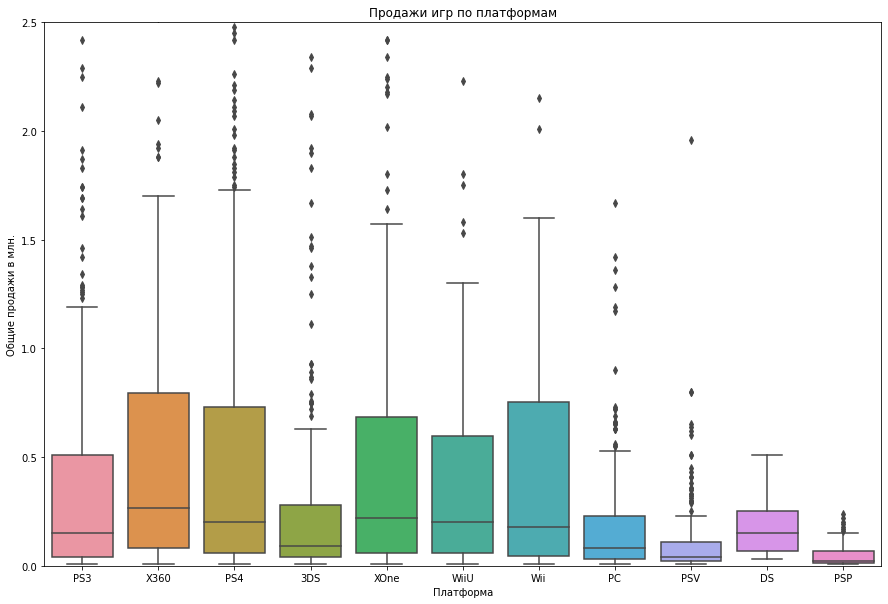

In [59]:
plt.figure(figsize=(15,10))
sb.boxplot(x='platform',y='total_sales', data=df_actual)
plt.ylim(0,2.5)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи в млн.')
plt.show()

Создали "ящик с усами" график по всем актуальным платформам и как и предполагалось, увидели огромное количество выбросов выше 3 квантиля собственно мы это уже увидели самом начале. очевидно что распределение ненормально и при том что большое количество игр укладываются до3 квантиля, выше 3 квантиля находится под фактически четверть игр.

Проведем отдельный анализ по 2м самым популярным платформам. PS4 и XOne

In [60]:
df_ps4 = df_actual[df_actual['platform']=='PS4']

In [61]:
df_xone = df_actual[df_actual['platform']=='XOne']

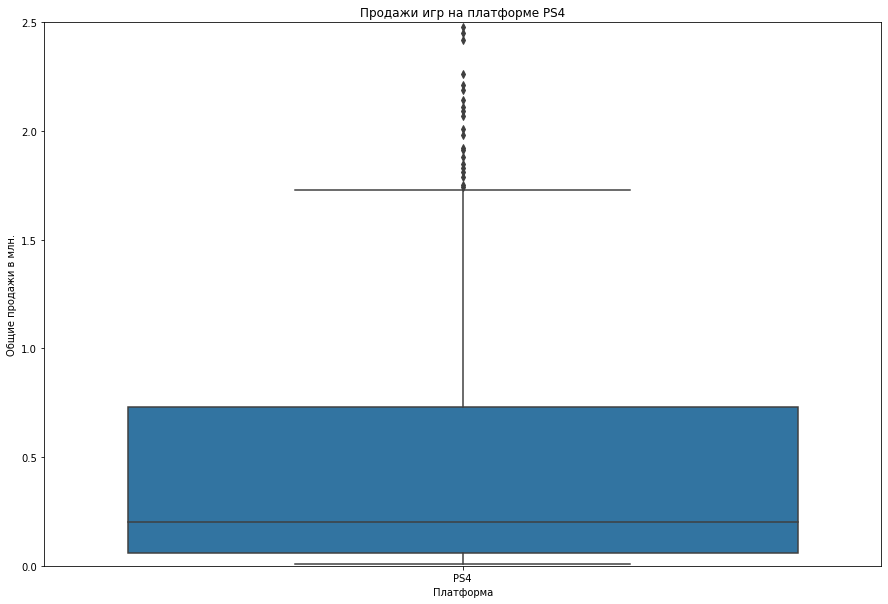

In [62]:
plt.figure(figsize=(15,10))
sb.boxplot(x='platform',y='total_sales', data=df_ps4)
plt.title('Продажи игр на платформе PS4')
plt.ylim(0,2.5)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи в млн.')
plt.show()

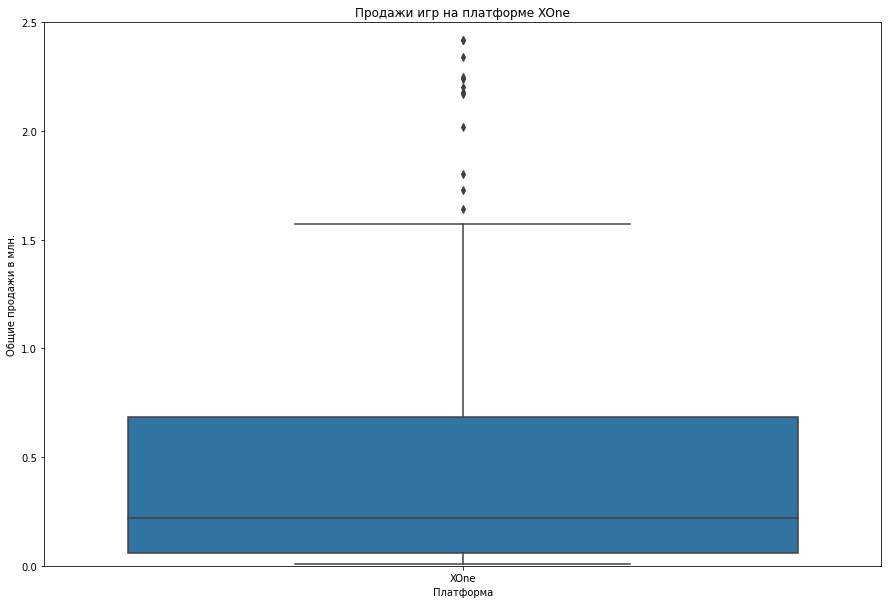

In [63]:
plt.figure(figsize=(15,10))
sb.boxplot(x='platform',y='total_sales', data=df_xone)
plt.title('Продажи игр на платформе XOne')
plt.ylim(0,2.5)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи в млн.')
plt.show()

In [64]:
df_ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [65]:
df_xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


Из графиков "ящик с усами" видно, что большое количество игр по продажам находится выше 3го квантиля. Оценим количество.

In [66]:
count_above_q3 = np.sum(np.array(df_ps4['total_sales']>0.73))
count_above_q3

97

In [67]:
count_above_q3 = np.sum(np.array(df_xone['total_sales']>0.685))
count_above_q3

62

Результат таков, что распределение далеко от нормального. Выше порога в 75% находится почти 19% игр.

Посмотрим, как влияют на продажи внутри двух популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

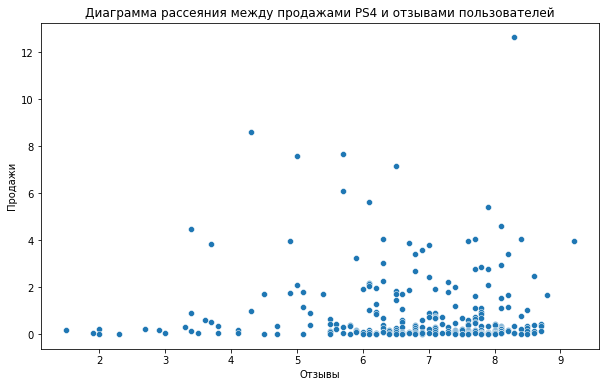

In [68]:
plt.figure(figsize=(10,6))
sb.scatterplot(y='total_sales',x='user_score', data=df_ps4)
plt.title('Диаграмма рассеяния между продажами PS4 и отзывами пользователей')
plt.ylabel('Продажи')
plt.xlabel('Отзывы')
plt.show()

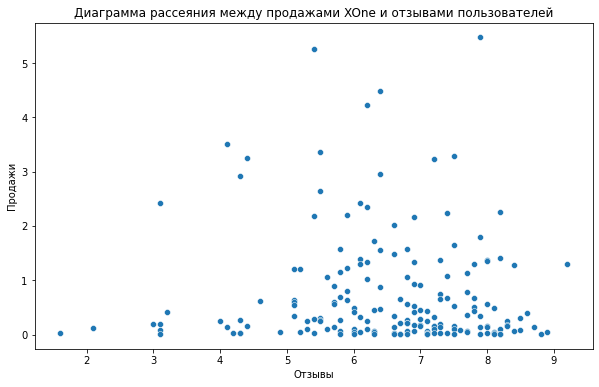

In [69]:
plt.figure(figsize=(10,6))
sb.scatterplot(y='total_sales',x='user_score', data=df_xone)
plt.title('Диаграмма рассеяния между продажами XOne и отзывами пользователей')
plt.ylabel('Продажи')
plt.xlabel('Отзывы')
plt.show()

In [70]:
corr = df_ps4['total_sales'].corr(df_ps4['user_score'])
print(f"Корреляция между продажами PS4 и отзывами:{corr}")

Корреляция между продажами PS4 и отзывами:-0.031957110204556376


In [71]:
corr = df_xone['total_sales'].corr(df_xone['user_score'])
print(f"Корреляция между продажами XOne и отзывами:{corr}")

Корреляция между продажами XOne и отзывами:-0.06892505328279412


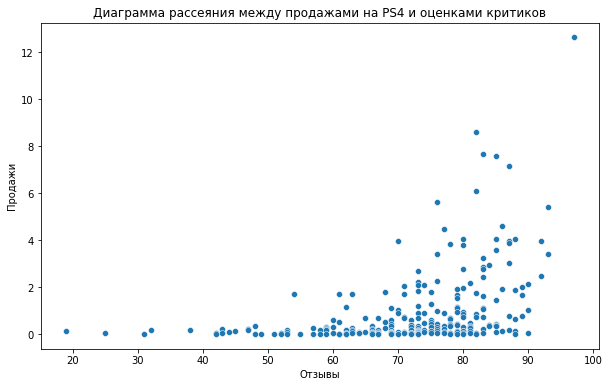

In [72]:
plt.figure(figsize=(10,6))
sb.scatterplot(y='total_sales',x='critic_score', data=df_ps4)
plt.title('Диаграмма рассеяния между продажами на PS4 и оценками критиков')
plt.ylabel('Продажи')
plt.xlabel('Отзывы')
plt.show()

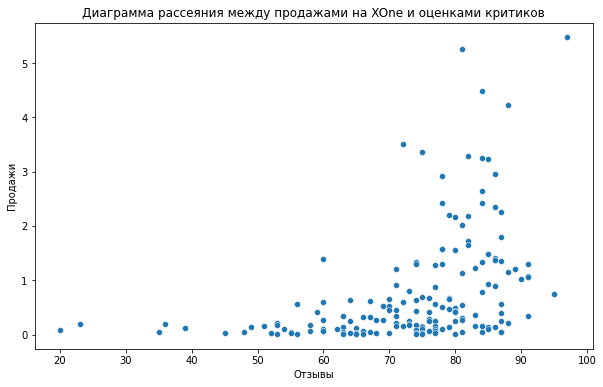

In [73]:
plt.figure(figsize=(10,6))
sb.scatterplot(y='total_sales',x='critic_score', data=df_xone)
plt.title('Диаграмма рассеяния между продажами на XOne и оценками критиков')
plt.ylabel('Продажи')
plt.xlabel('Отзывы')
plt.show()

In [74]:
corr = df_ps4['total_sales'].corr(df_ps4['critic_score'])
print(f"Корреляция между продажами на PS4 и оценками критиков:{corr}")

Корреляция между продажами на PS4 и оценками критиков:0.406567902061781


In [75]:
corr = df_xone['total_sales'].corr(df_xone['critic_score'])
print(f"Корреляция между продажами на XOne и оценками критиков:{corr}")

Корреляция между продажами на XOne и оценками критиков:0.41699832800840175


Вывод: На платформах PS4 XOne - корреляция отсутствует c оценками пользователей. И довольно высокая корреляция с критиками. При этом данные по 2м самым популярным платформам практически совпадают. 

Напишем цикл и посчитаем корреляции для 5 следующих по популярности платформ. Сравним результаты с полученными.

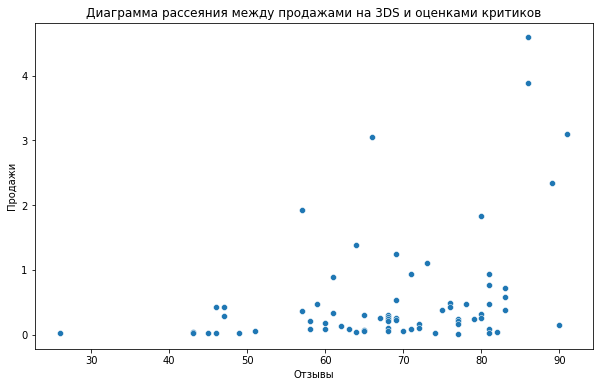

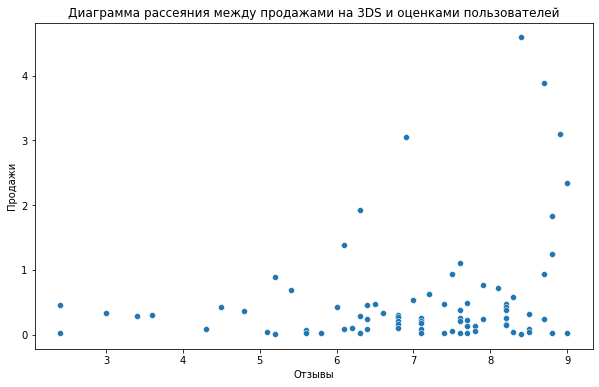

Корреляция между продажами и отзывами пользователей для 3DS:0.24
Корреляция между продажами и рейтингом критиков для 3DS:0.36




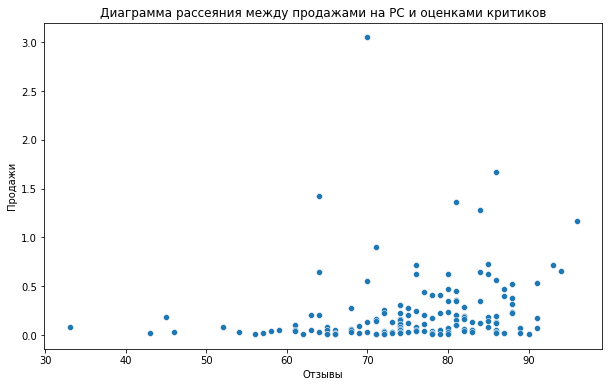

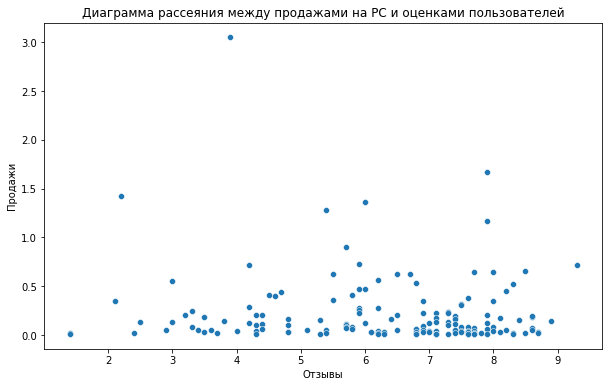

Корреляция между продажами и отзывами пользователей для PC:-0.09
Корреляция между продажами и рейтингом критиков для PC:0.20




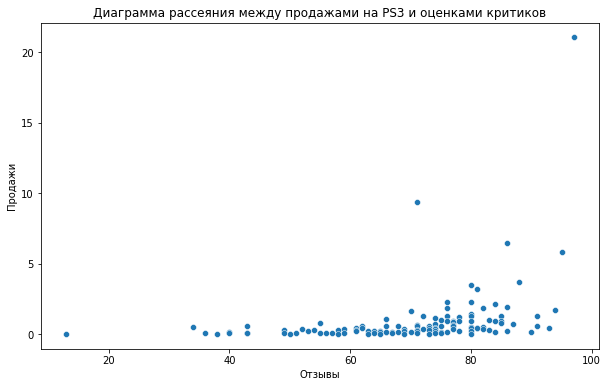

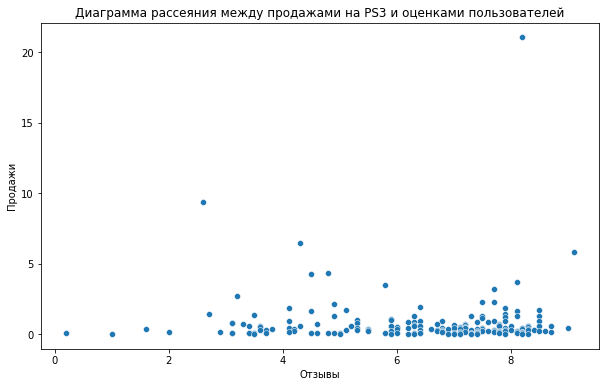

Корреляция между продажами и отзывами пользователей для PS3:0.00
Корреляция между продажами и рейтингом критиков для PS3:0.33




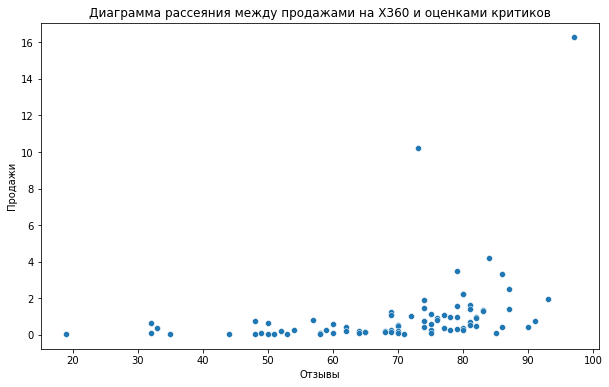

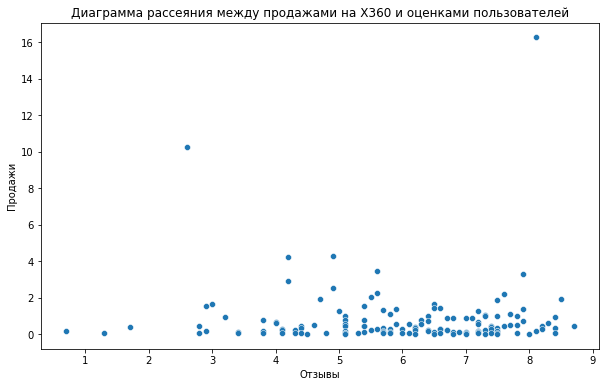

Корреляция между продажами и отзывами пользователей для X360:-0.01
Корреляция между продажами и рейтингом критиков для X360:0.35




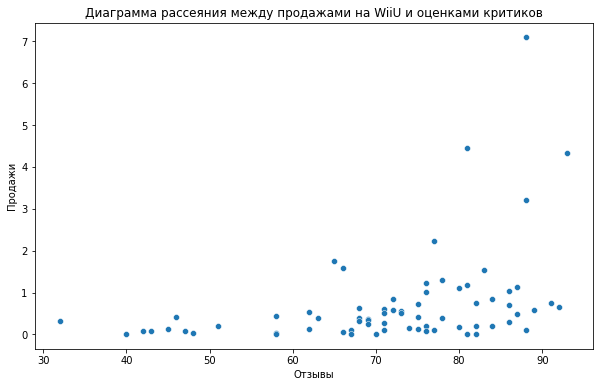

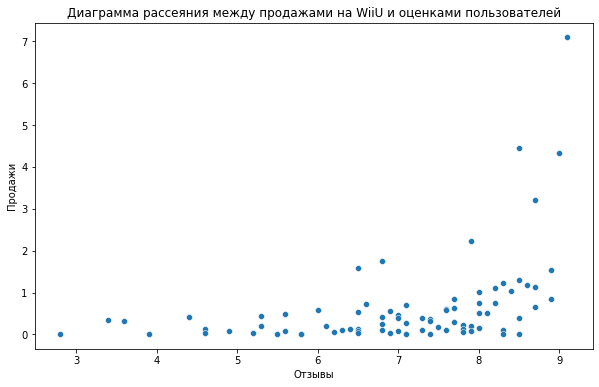

Корреляция между продажами и отзывами пользователей для WiiU:0.42
Корреляция между продажами и рейтингом критиков для WiiU:0.38




In [76]:
platforms = ['3DS', 'PC', 'PS3', 'X360','WiiU']
for plat in platforms:
    plat_data = df_actual[df_actual['platform']==plat]
    plt.figure(figsize=(10,6))
    sb.scatterplot(y='total_sales',x='critic_score', data=plat_data)
    plt.title(f'Диаграмма рассеяния между продажами на {plat} и оценками критиков')
    plt.ylabel('Продажи')
    plt.xlabel('Отзывы')
    plt.show()
    plt.figure(figsize=(10,6))
    sb.scatterplot(y='total_sales',x='user_score', data=plat_data)
    plt.title(f'Диаграмма рассеяния между продажами на {plat} и оценками пользователей')
    plt.ylabel('Продажи')
    plt.xlabel('Отзывы')
    plt.show()
    corr_sales_userscore = plat_data['total_sales'].corr(plat_data['user_score'])
    print(f'Корреляция между продажами и отзывами пользователей для {plat}:{corr_sales_userscore:.2f}')
    corr_sales_critic = plat_data['total_sales'].corr(plat_data['critic_score'])
    print(f'Корреляция между продажами и рейтингом критиков для {plat}:{corr_sales_critic:.2f}')
    print('\n')

Вывод - здесь видим несколько иную картину. Для платформ Nintendo (3DS, WiiU) относительно высокая корреляция с отзывами пользователей. При этом для всех платформ высокая корреляция с рейтингом критиков. Наименее чувствительная платформа к отзывам и рейтингу критиков - PC.

### Анализ популярных жанров.

Посмотрим на общее распределение игр по жанрам. Опишем самые прибыльные жанры. 

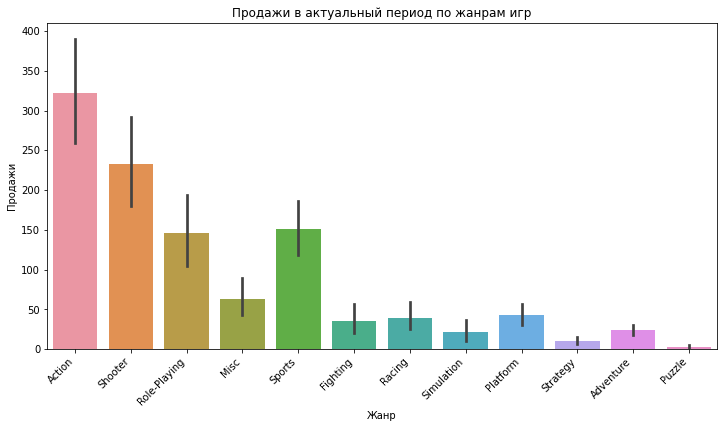

In [77]:
plt.figure(figsize=(12,6))
sb.barplot(x='genre',y='total_sales',data=df_actual, estimator=sum)
plt.title('Продажи в актуальный период по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')
plt.show()

In [78]:
# plt.figure(figsize=(12,6))
# sb.barplot(x='genre',y='total_sales',data=df_xone, estimator=sum, ci=None)
# plt.title('Продажи на XOne по жанрам игр')
# plt.xlabel('Жанр')
# plt.ylabel('Продажи')
# plt.xticks(rotation=45, ha='right')

По личному опыту деление на жанры весьма условно. Часто игры совмещают ряд жанров. В какой-то игре может быть и элементы шутера, и ходилки, и ролевой игры и стратегии. Тем не менее явно выделяются лидеры и аутсайдеры жанров. В лидеры относятся: Action, Shooter, Sports, Role-playing. В аутсайдерах - Puzzle, Strategy, Simulation, Adventure. Явный приоритет у динамичных игр над "мыслительными"

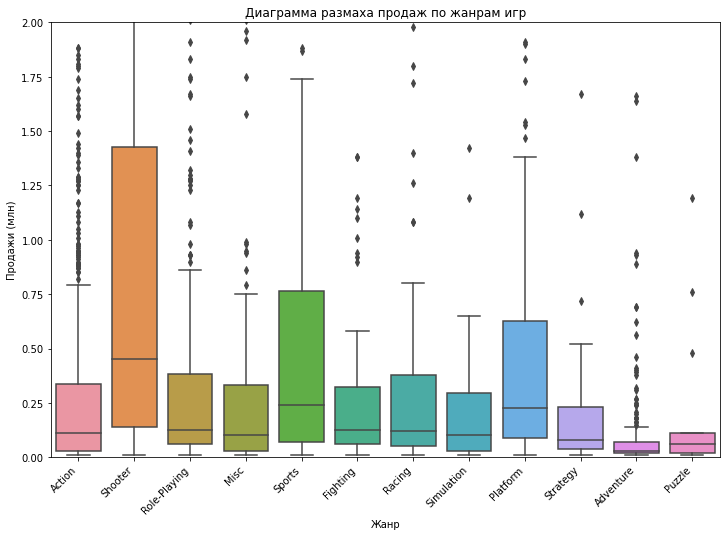

In [79]:
plt.figure(figsize=(12,8))
sb.boxplot(x='genre',y='total_sales',data=df_actual)
sb.set(style='whitegrid')
plt.title('Диаграмма размаха продаж по жанрам игр')
plt.ylim(0,2)
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45, ha='right')
plt.show()

Теперь мы оценили медианные продажи игр по жанрам и картина изменилась!На 1е место вышла Shooter, 2е- Sports. а 3е неожиданно - Platform. Лидер по объему продаж Action полностью утратил свое лидерство. Это говорит о том, что успех в продажах обеспечен отдельными удачными играми, а не стабильностью жанра.

In [80]:
pivot_table = df_actual.pivot_table(values='total_sales',index='genre',
aggfunc='median').sort_values(by='total_sales', ascending=False)
pivot_table

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Еще небольшое наблюдение: жанры с 4 по 10е место имеют довольно близкие медианные продажи (100+-20)тыс.копий.

## Портрет пользователя в каждом регионе

Составим портрет пользователя каждого региона: Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишим различия в долях продаж. Самые популярные жанры (топ-5). Поясним разницу. Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

### Продажи по платформам в Северной Америке

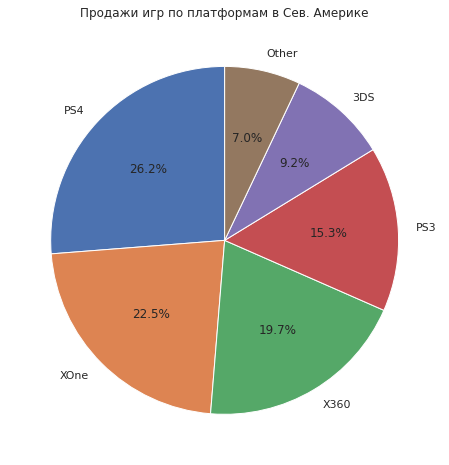

In [81]:
plat_sales = df_actual.groupby('platform')['na_sales'].sum()
top_plats = plat_sales.nlargest(5)
other_sales = plat_sales.nlargest(6).iloc[-1]
top_plats['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_plats, labels=top_plats.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по платформам в Сев. Америке')
plt.show()

Вывод: В Северной Америке самые популярные PS4, XOne X360. При этом значения довольно близки.

### Продажи по платформам в Европе

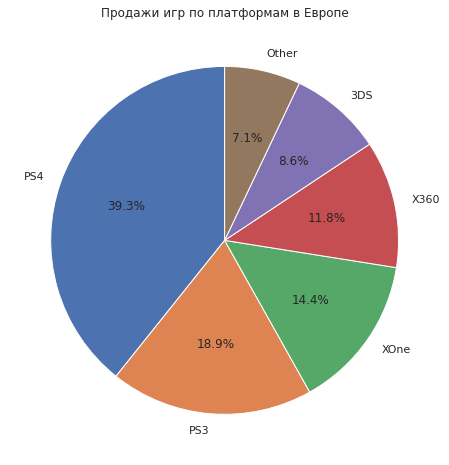

In [82]:
plat_sales = df_actual.groupby('platform')['eu_sales'].sum()
top_plats = plat_sales.nlargest(5)
other_sales = plat_sales.nlargest(6).iloc[-1]
top_plats['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_plats, labels=top_plats.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по платформам в Европе')
plt.show()

Вывод: с огромным отрывом лидирует PS4. За ним идут PS3, XOne.

### Продажи по платформам в Японии

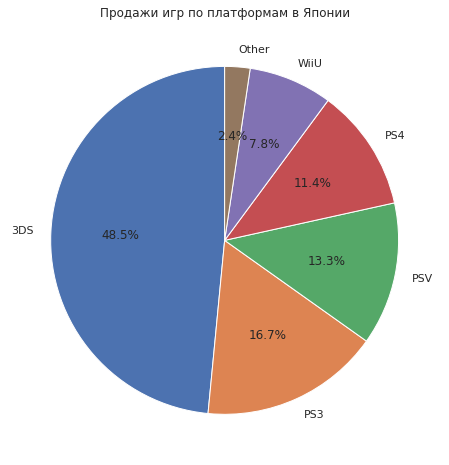

In [83]:
plat_sales = df_actual.groupby('platform')['jp_sales'].sum()
top_plats = plat_sales.nlargest(5)
other_sales = plat_sales.nlargest(6).iloc[-1]
top_plats['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_plats, labels=top_plats.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по платформам в Японии')
plt.show()

Совершенно иная картина в Японии. На первом месте с большим отрывом - 3DS(Nintendo), далее PS3, PSV. PS4 не входит в тройку.

### Продажи по жанрам в Северной Америке

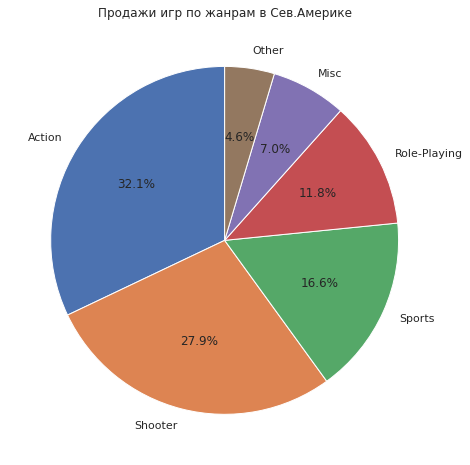

In [84]:
genre_sales = df_actual.groupby('genre')['na_sales'].sum()
top_genres = genre_sales.nlargest(5)
other_sales = genre_sales.nlargest(6).iloc[-1]
top_genres['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по жанрам в Сев.Америке')
plt.show()

По популярности на 1м месте Action. Далее Shooter Sports. Напомню, что деление игр по жанрам довольно условно т.к. современные игры мультижанровые. Содержат элементы разных жанров и классифицировать их по 1му жанру не верно.

### Продажи по жанрам в Европе

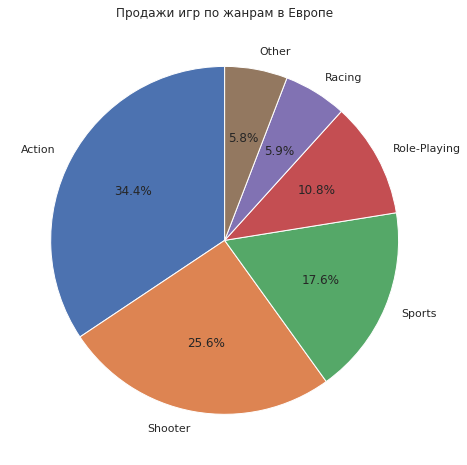

In [85]:
genre_sales = df_actual.groupby('genre')['eu_sales'].sum()
top_genres = genre_sales.nlargest(5)
other_sales = genre_sales.nlargest(6).iloc[-1]
top_genres['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по жанрам в Европе')
plt.show()

Тут полная солидарность с Америкой. Теже лидеры и очень похожие пропорции. 

### Продажи по жанрам в Японии

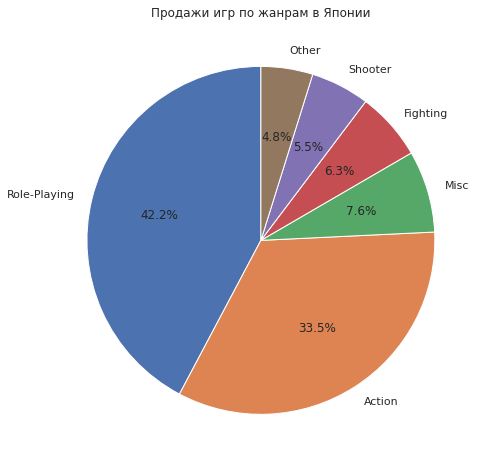

In [86]:
genre_sales = df_actual.groupby('genre')['jp_sales'].sum()
top_genres = genre_sales.nlargest(5)
other_sales = genre_sales.nlargest(6).iloc[-1]
top_genres['Other'] = other_sales
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index,
       autopct='%1.1f%%',
       startangle=90)
plt.title('Продажи игр по жанрам в Японии')
plt.show()

Тут опять Япония идет своим путем. Ролевые и Action держат 75% рынка

### Влияет ли рейтинг ESRB на продажи в регионе

In [87]:
print(df_actual['rating'].unique())

['M' nan 'E' 'T' 'E10+']


На этом этапе нам необходимо заменить пропуски в рейтинге за заглушку "unknown"

In [88]:
df_actual['rating'].fillna('unknown',inplace=True)

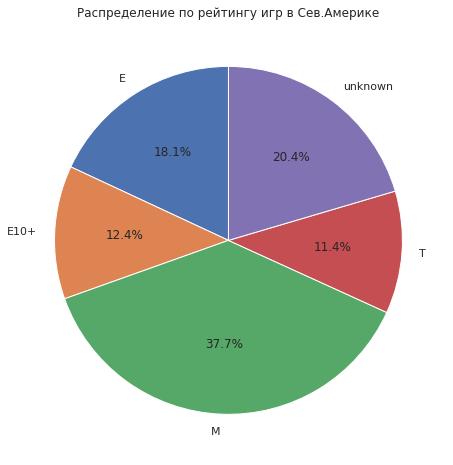

In [89]:
rating_sales = df_actual.groupby('rating')['na_sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(rating_sales,labels=rating_sales.index,
       autopct='%1.1f%%', startangle=90)
plt.title('Распределение по рейтингу игр в Сев.Америке')
plt.show()

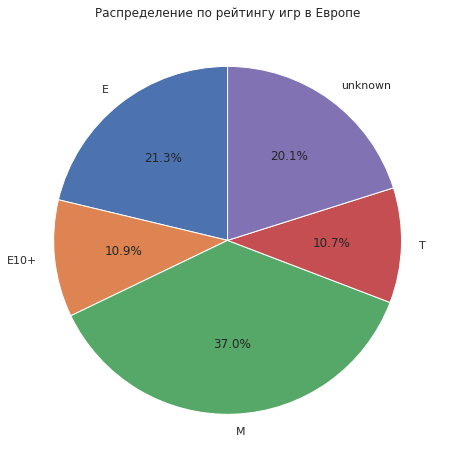

In [90]:
rating_sales = df_actual.groupby('rating')['eu_sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(rating_sales,labels=rating_sales.index,
       autopct='%1.1f%%', startangle=90)
plt.title('Распределение по рейтингу игр в Европе')
plt.show()

Здесь опять Америка солирадна с Европой. Распределение по рейтингам практически идентично. Характерно, что тут только 20% игр без рейтинга. Это позволяет предположить, что рейтинговое агенство оценивало игры,, представленные на этих рынках. Поэтому токой достаточно высокий % охвата.

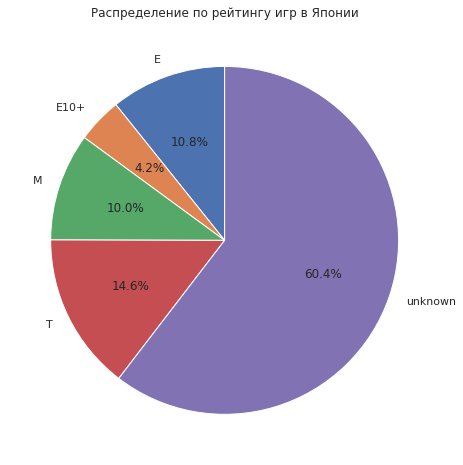

In [91]:
rating_sales = df_actual.groupby('rating')['jp_sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(rating_sales,labels=rating_sales.index,
       autopct='%1.1f%%', startangle=90)
plt.title('Распределение по рейтингу игр в Японии')
plt.show()

В Японии опять все иначе. Более 60% игр не имеют рейтинга. Что опять подтверждает версию, что оценке подвергались игры на Американском и Европейском рынке

# Проверка гипотез

Проверка гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые Так как речь идет о сравнении двух выборок, то логичным будет провести двусторонний t-test, потому что мы не интересуемся, где среднее выборки больше или меньше, нас интересует лишь критерий равенства / не равенства Нас интересует "средние пользовательские рейтинги платформ Xbox One и PC одинаковые", значит инверсия этого предположения - альтернативное предположение, в пользу которого мы можем отвергнуть первое. В таком случае справедливо сделать так:
Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые Возьмем показатель статистической значимости = 5%


In [92]:
xone_sales = df_actual[df_actual['platform']=='XOne']['user_score'].dropna()
#print ('Размер выборки Xone:', len(xone_sales))
xone_sales.describe()
pc_sales = df_actual[df_actual['platform']=='PC']['user_score'].dropna()
#print ('Размер выборки PC:', len(pc_sales))
alpha = 0.05
results = st.ttest_ind(xone_sales, pc_sales, alternative='two-sided')
print(f'p-value:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print ('Оставляем нулевую гипотезу')

p-value:0.14012658403611647
Оставляем нулевую гипотезу


In [93]:
xone_sales.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [94]:
pc_sales.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Полученное p-value превышает выбранный уровень статистической значимости (0.05). Следовательно, у нас нет достаточных оснований для отклонения нулевой гипотезы, и мы не можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются

Тут мы оценили размеры выборок, стандартные отклонения, средние значения, отсутствие выбросов. Все это говорит о законности использования t-test и прямое сравнение средних значений говорит о справедливости выводов теста. 

In [95]:
# print("data_xone mean value:", xone_sales.mean())
# print("data_pc mean value:", pc_sales.mean())

Вывод: Из эксперимента делаем вывод о равенстве средних пользовательских рейтингов платформ XOne и PC

Гипотеза: средние пользовательские рейтинги жанров Action Sports разные.

Средние пользовательские рейтинги жанров Action и Sports разные. Вспоминая прошлую гипотезу, не сложно догадаться, что можно провести аналогичные рассуждения, в ходе которого логичным будет взять "Средние пользовательские рейтинги жанров Action и Sports разные" за альтернативную гипотезу:
Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные


In [96]:
action_sales = df_actual[df_actual['genre']=='Action']['user_score'].dropna()
sports_sales = df_actual[df_actual['genre']=='Sports']['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(action_sales, sports_sales, alternative='two-sided')
print(f'p-value:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print ('Оставляем нулевую гипотезу')

p-value:1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [97]:
print("action-sales mean value:", action_sales.mean())
print("sport-sales mean value:", sports_sales.mean())

action-sales mean value: 6.837532133676092
sport-sales mean value: 5.238124999999999


In [98]:
action_sales.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [99]:
sports_sales.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Здесь мы также оцениваем законность использования t-test. Выборки большие, независимые, ди 

Вывод: Из эксперимента делаем вывод о различии средних пользовательских рейтингов жанров Action и Sports.


<p>    <b>Правила формулирования нулевой и альтернативной гипотез:</b><br>
- <i>Нулевая гипотеза (H0)</i> - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.<br>
- <i>Альтернативная гипотеза (H1)</i> - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.</p>
<p><b>Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:</b><br>
- <i>Нормальное распределение данных:</i> t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.<br>
- <i>Равномерное распределение данных в каждой группе:</i> t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.<br>
- <i>Независимость выборок:</i> t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.<br>
- <i>Достаточно большой размер выборки:</i> для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.<br> 
- <i>Отсутствие выбросов:</i> t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.<br>
- <i>Однородность дисперсий:</i> t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.</p></font>

# Общий вывод

В данном проекте мы проанализировали базу данных по продажам компьютерных игр. Выявили лилеров по жанрам и платформам. Составили типовой портрет пользователя в Сев.Америке, Европе и Японии. Оценили влияние рейтинга ESRB на продажи. проверили несколько статистических гипотез. Все практические выводы содержатся по ходу выполнения проекта.

В ходе предобратботки проведены след.работы:

    общий анализ данных
    обработаны пропуски в названии игры. 2 строчки с пропуском удалены.
    названия столюцов приведены к нижнему регистру
    проверены и обработаны явные и неявные дубликаты.
    Частично добавлен пропущенный год выпуска на год, взятый из названия игры.
    Удалены отставшиеся строки с пропуском в годе выпуска
    Изменен тип данных Года выпуска на целый.
    рейтинг tbd в оценках пользователя заменен на NaN. tbd расшифровывается как to be determined (подлежит определению). Что эквивалентно NaN.
    По итогу выявлено, что остались пропуски только в 3 категориях рейтингов. Это легко обяснимо. Продажи учитываются по всему миру. При этом есть игры, которые продаются только на локальном рынке. А оценка могла происходить на другом рынке. Поэтому игра просто не попала в рассматриваемые. Также игра с мин.продажами никому особо не интересна и могла сознательно не оцениваться рейтингом. Также рейтинг ESRB это рейтинг амер. и европейских производителей. Заведомо японские локальные игры им не оцениваются. Также могли не попадать под рейтинг игры на каких-то платформах. Или в целом присваивать рейтинг начали лишь с какого-то года. Как бы то ни было, у нас нет задачи заполнять рейтинг каким-то значением(числовым). Последующие оценки проведем по существующим рейтингам.
    В столбце rating стоят символьные значения. И мы можем безболезненно заменить в дальнейшем пропущенные значения на заглушку "unknown"

Рассмотрели продажи на топ платформах. увидели характерные пиковую 2007 2008 году после чего вместе с мировым кризисом пошли вниз. после этого в 2011-12 гг пошла некая стабилизация на определённом уровне

Среднее время жизни платформы - 7 лет. Возьмем актуальный период, равный 4 годам. Т.образом рассмотрим данные, начиная с 2013. Это примерно половина жизненного цикла платформы.Математически это объясняется так: раз средний срок жизни платформы 7 лет, то средний возраст действующих живых платформ будет равен половине поэтому берем 3,5 условно и как раз период с 2013 года включая до 2016 года будет так называемый актуальный период. Имеем еще ввиду что данные за 2016 не полные.

Создали тепловую карту по актуальным платформам это позволило выявить нам лидеров и понять тенденции по каждой платформе какие платформы растущая стагнирующей итак далее
самая популярная платформа PS4. Если предположить, что данные за 2016г. неполные, то продажи на ней растут. Аналогично XOne. На 3м месте по продажам - 3DS. Но на ней убывающая динамика. Все остальные платформы значительно уступают по продажам и снижаются.

 На платформах PS4 XOne - корреляция отсутствует c оценками пользователей. И довольно высокая корреляция с критиками. При этом данные по 2м самым популярным платформам практически совпадают. 
 Для платформ Nintendo (3DS, WiiU) относительно высокая корреляция с отзывами пользователей. При этом для всех платформ высокая корреляция с рейтингом критиков. Наименее чувствительная платформа к отзывам и рейтингу критиков - PC.
 
 По личному опыту деление на жанры весьма условно. Часто игры совмещают ряд жанров. В какой-то игре может быть и элементы шутера, и ходилки, и ролевой игры и стратегии. Тем не менее явно выделяются лидеры и аутсайдеры жанров. В лидеры относятся: Action, Shooter, Sports, Role-playing. В аутсайдерах - Puzzle, Strategy, Simulation, Adventure. Явный приоритет у динамичных игр над "мыслительными"
 
 В Северной Америке самые популярные PS4, XOne X360. При этом значения довольно близки.
 
 В Европе с огромным отрывом лидирует PS4. За ним идут PS3, XOne.
 
 Совершенно иная картина в Японии. На первом месте с большим отрывом - 3DS(Nintendo), далее PS3, PSV. PS4 не входит в тройку.
 
 По рейтингу ESRB Здесь опять Америка солирадна с Европой. Распределение по рейтингам практически идентично. Характерно, что тут только 20% игр без рейтинга. Это позволяет предположить, что рейтинговое агенство оценивало игры,, представленные на этих рынках. Поэтому токой достаточно высокий % охвата.
 
 В Японии опять все иначе. Более 60% игр не имеют рейтинга. Что опять подтверждает версию, что оценке подвергались игры на Американском и Европейском рынке
 
 Проверка гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. В ходе эксперимента гипотезы подтвердились
 

По личному опыту деление на жанры весьма условно. Часто игры совмещают ряд жанров. В какой-то игре может быть и элементы шутера, и ходилки, и ролевой игры и стратегии. Тем не менее явно выделяются лидеры и аутсайдеры жанров. По общим продажам к лидерам относятся: Action, Shooter, Sports, Role-playing. В аутсайдерах - Puzzle, Strategy, Simulation, Adventure. Явный приоритет у динамичных игр над "мыслительными". Но как показал дальнейший анализ, данное лидерство обеспечивается продажами особо удачных игр. Если мы анализируем медианные продажи по жанрам, то картина сильно меняется.  
На 1е место вышла Shooter, 2е- Sports. а 3е неожиданно - Platform. Лидер по объему продаж Action полностью утратил свое лидерство. Это говорит о том, что успех в тотальном объеме продаж  обеспечен отдельными удачными играми, а не стабильностью жанра. 